<a href="https://colab.research.google.com/github/adams-gc/BF-python-class/blob/main/Text_classification__logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
1405,sport,greek sprinters won t run again the careers ...
776,politics,talks aim to avert pension strike talks aimed ...
1647,tech,game makers get xbox 2 sneak peek microsoft ha...
1073,entertainment,sundance to honour foreign films international...
814,entertainment,band aid 20 single storms to no 1 the new vers...
...,...,...
1870,sport,jones doping probe begins an investigation int...
258,sport,italy 8-38 wales wales secured their first awa...
1385,politics,new drink limit would cut toll more lives th...
796,tech,uk broadband gets speed injection broadband s ...


In [ ]:
#No of a categories
len(set(df['category']))

5

In [ ]:
df.groupby('category').category.count()

,category
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


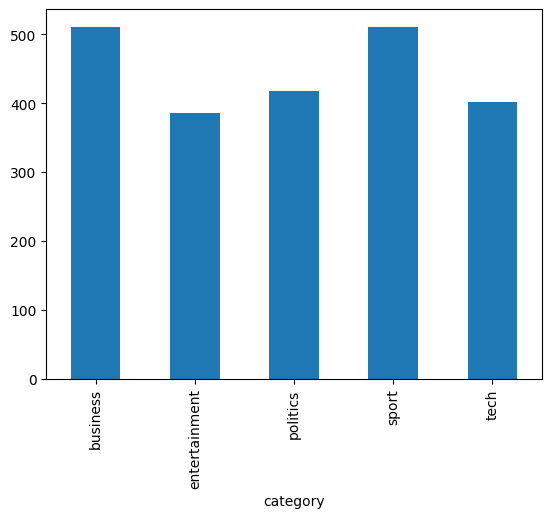

In [ ]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
#Data Preprocessing

In [ ]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
# " ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
data

['I', 'am', 'loving', 'computing']

In [ ]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [ ]:
# Data Cleaning removing stopwords

In [ ]:
news = ''
data = "I am loving computing".lower().split()
for i in data:
  if i not in words:
    news = news + " " +i
news
  # print(i)

' loving computing'

In [ ]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
1405,sport,greek sprinters run careers sprinters kostas k...
776,politics,talks aim avert pension strike talks aimed ave...
1647,tech,game makers get xbox sneak peek microsoft give...
1073,entertainment,sundance honour foreign films international fi...
814,entertainment,band aid single storms new version band aid so...
...,...,...
1870,sport,jones doping probe begins investigation doping...
258,sport,italy wales wales secured first away win rbs s...
1385,politics,new drink limit would cut toll lives previousl...
796,tech,uk broadband gets speed injection broadband ra...


In [ ]:
df.to_csv('cleaned_bbc_data.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)


from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

svc_pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
])
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [ ]:
X_test

,text
1343,melzer shocks agassi san jose second seed andr...
167,top judge clashes ministers uk top judge revea...
1443,petrol duties frozen brown says chancellor gor...
79,khodorkovsky ally denies charges close associa...
637,nintendo ds makes euro debut nintendo ds handh...
...,...
1096,internet boom gift shopping cyberspace becomin...
776,talks aim avert pension strike talks aimed ave...
725,vw considers opening indian plant volkswagen c...
1153,beattie return calms attack fears everton stri...


In [ ]:
y_test

,category
1343,sport
167,politics
1443,politics
79,business
637,tech
...,...
1096,tech
776,politics
725,business
1153,sport


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9850299401197605


In [ ]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Cimex Inc, the authorized dealer of BYD vehicles for Nepal, has launched the Cimex BYD Charity Foundation.  The company said it has contributed Rs 10 million to the Foundation and will deposit Rs 10,000 in it from the sale of each electric vehicle.  Speaking during the launch of the Foundation, Liu Xueliang, general manager of BYD Asia Pacific Auto Sales Division, said that BYD has enjoyed remarkable success in Nepal.  Setopati talked to Liu about various issues including the electric vehicle market in Nepal, the efficiency and durability of such vehicles, and BYD’s future plans.  Here is an edited version of the interview.  Liu-Xueliang-01-1725970471.jpg    As the world increasingly embraces electric vehicles (EVs), what is your perspective on the electric vehicle market in Nepal?  Nepal is a country that has seen a very widespread adoption of electric vehicles, thanks also to the government’s favorable policies to support electric vehicles. Also, Nepal is a country rich 

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       0.96      0.97      0.97        77
entertainment       1.00      1.00      1.00        43
     politics       0.97      0.96      0.97        74
        sport       1.00      1.00      1.00        72
         tech       1.00      1.00      1.00        68

     accuracy                           0.99       334
    macro avg       0.99      0.99      0.99       334
 weighted avg       0.99      0.99      0.99       334

[[75  0  3  0  0]
 [ 0 43  0  0  0]
 [ 2  0 71  0  0]
 [ 0  0  0 72  0]
 [ 0  0  0  0 68]]


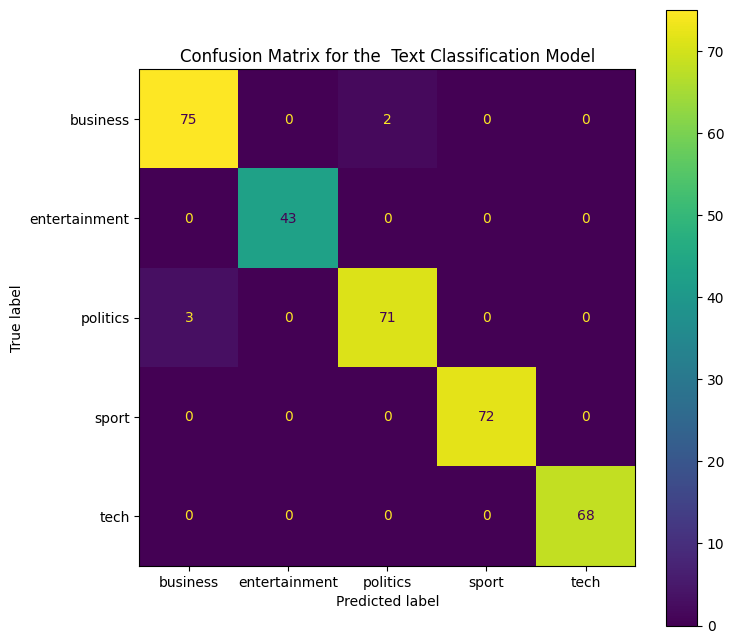

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);